# Auto Encoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.models import Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import Image

In [ ]:
tf.random.set_seed(2021)
np.random.seed(2021)

## Auto Encoder
- Using Dense layer, we will compress MNIST to 3d vector so we can visualize it. 
- This is called Auto Encoder design.

In [ ]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", 
      width=1000, height=200)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

## Auto Encoder Diagram

In [ ]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", 
      width=500, height=250)

## Modeling

In [ ]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))

# Encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(3, activation='sigmoid')(encoder1)

# Decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 202,515
Trainable params: 202,515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=32,
                shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2820 - val_loss: 0.2240
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2258 - val_loss: 0.2022
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2094 - val_loss: 0.1989
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2060 - val_loss: 0.1963
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2038 - val_loss: 0.1932


In [ ]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [ ]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)

# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

## MNIST 3D Visualization

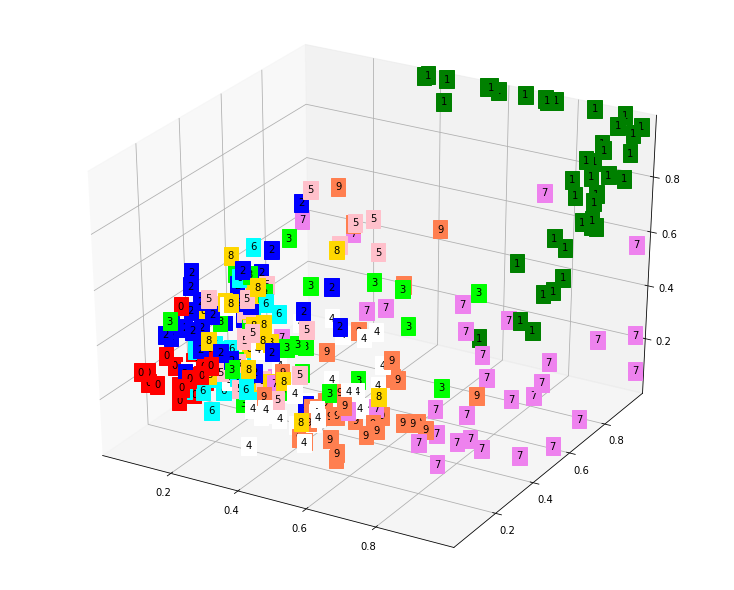

In [ ]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

## Visualize Reconstructed Images

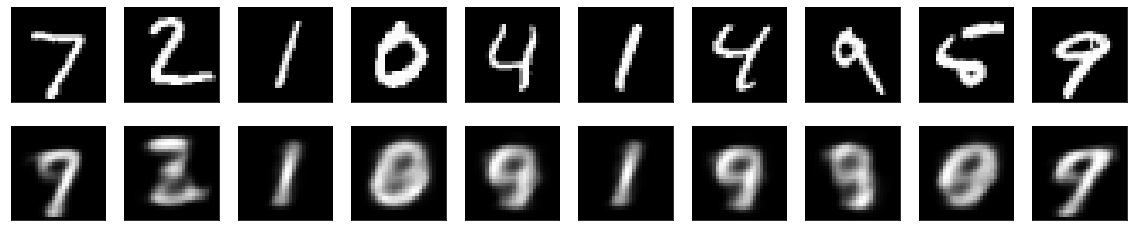

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()